`Explanatory Data Analysis for Data-1`

`Summary Statistics`

mean, median, standard deviation and other statistical measures

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('../data/raw_data/togo-dapaong_qc.csv')

print(data.head())

summary_stats = data.describe().transpose()

print(summary_stats)


          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
                  co

``Data Quality Check``

In [2]:

def detect_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5* IQR
  upper_bound = Q3 + 1.5* IQR
  outliers = df[(df[column] < lower_bound) | df[column] > upper_bound]
  return outliers


columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']


outliers = {}
for column in columns_to_check:
  outliers[column] = detect_outliers(data, column)
  
  
print("Missing values: \n", data.isnull().sum())
negative_values = data[columns_to_check] < 0
print("Negative Values: \n", negative_values)
for column in columns_to_check:
    print(f"Outliers in {column}: {len(outliers[column])}")

Missing values: 
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Negative Values: 
          GHI    DNI    DHI   ModA   ModB     WS  WSgust
0       True  False  False  False  False  False   False
1       True  False  False  False  False  False   False
2       True  False  False  False  False  False   False
3       True  False  False  False  False  False   False
4       True  False  False  False  False  False   False
...      ...    ...    ...    ...    ...    ...     ...
525595  True  False  False  False  False  False   False
525596  True  False  False  False  False  Fals

`Time Series Analysis`

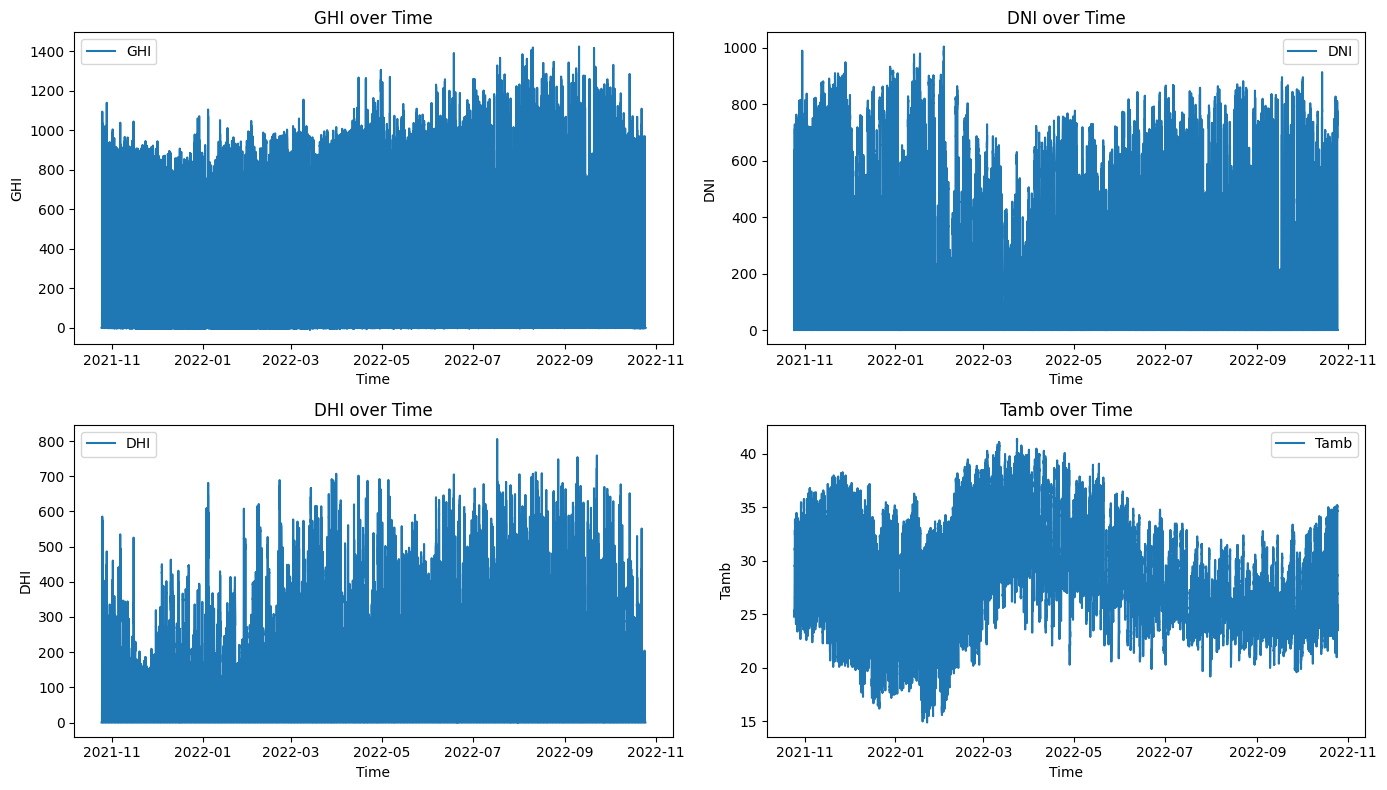

In [3]:

data['Timestamp'] = pd.to_datetime(data['Timestamp'])

data.set_index('Timestamp', inplace=True)

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(data.index, data['GHI'], label='GHI')
plt.title('GHI over Time')
plt.xlabel('Time')
plt.ylabel('GHI')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(data.index, data['DNI'], label='DNI')
plt.title('DNI over Time')
plt.xlabel('Time')
plt.ylabel('DNI')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(data.index, data['DHI'], label='DHI')
plt.title('DHI over Time')
plt.xlabel('Time')
plt.ylabel('DHI')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(data.index, data['Tamb'], label='Tamb')
plt.title("Tamb over Time")
plt.xlabel('Time')
plt.ylabel('Tamb')
plt.legend()

plt.tight_layout()
plt.show()

`Evalutate the impact of Cleaning on Sensor Readings`

/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-0/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


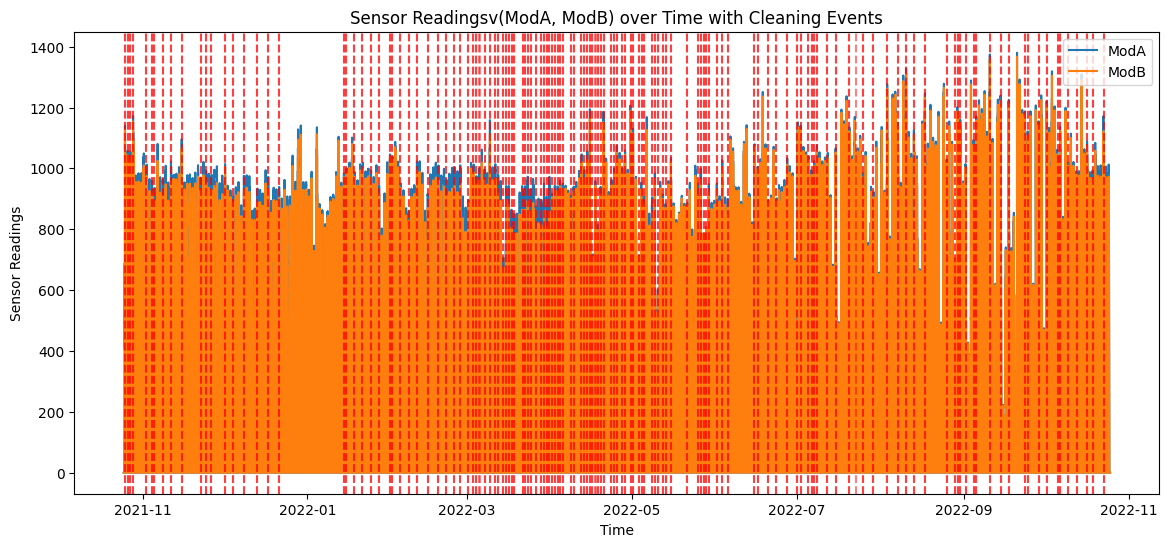

In [4]:
plt.figure(figsize=(14, 6))

plt.plot(data.index, data['ModA'], label='ModA')
plt.plot(data.index, data['ModB'], label='ModB')

cleaning_events = data[data['Cleaning'] == 1].index
for event in cleaning_events:
  plt.axvline(x=event, color='red', linestyle='--', alpha=0.5)
  
plt.title('Sensor Readingsv(ModA, ModB) over Time with Cleaning Events')
plt.xlabel('Time')
plt.ylabel('Sensor Readings')
plt.legend()
plt.show()

`Correlation Analysis`

             GHI       DNI       DHI     TModA     TModB        WS    WSgust  \
GHI     1.000000  0.877293  0.852080  0.898211  0.919220  0.421698  0.443923   
DNI     0.877293  1.000000  0.532717  0.765881  0.783572  0.366667  0.384870   
DHI     0.852080  0.532717  1.000000  0.802319  0.820360  0.390597  0.410531   
TModA   0.898211  0.765881  0.802319  1.000000  0.985069  0.328273  0.357374   
TModB   0.919220  0.783572  0.820360  0.985069  1.000000  0.353334  0.380626   
WS      0.421698  0.366667  0.390597  0.328273  0.353334  1.000000  0.977587   
WSgust  0.443923  0.384870  0.410531  0.357374  0.380626  0.977587  1.000000   
WD      0.089896 -0.017950  0.154095  0.199702  0.198834  0.164655  0.185546   

              WD  
GHI     0.089896  
DNI    -0.017950  
DHI     0.154095  
TModA   0.199702  
TModB   0.198834  
WS      0.164655  
WSgust  0.185546  
WD      1.000000  


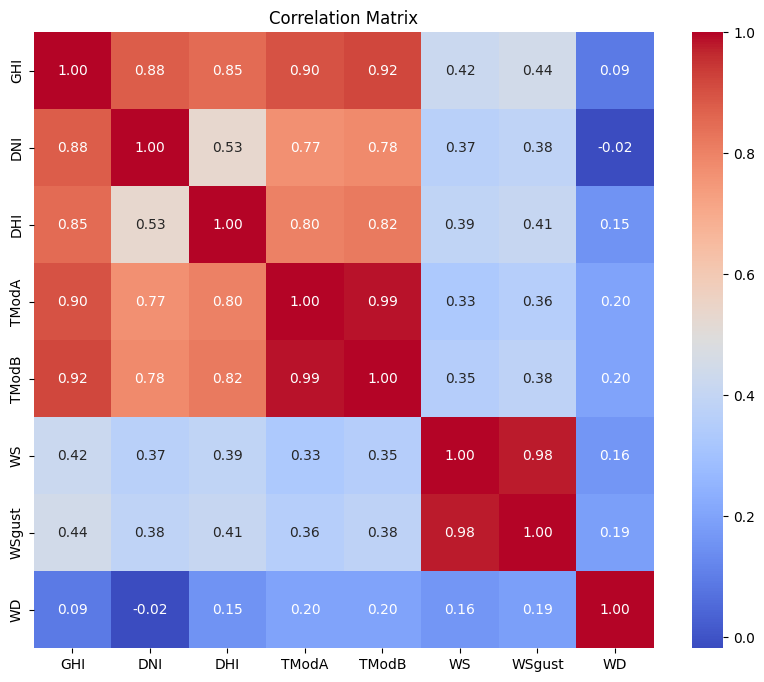

In [5]:

columns_of_interest = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']
correlation_matrix = data[columns_of_interest].corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# sns.pairplot(data[columns_of_interest])
# plt.show()

`Scatter Matrix`

/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-0/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


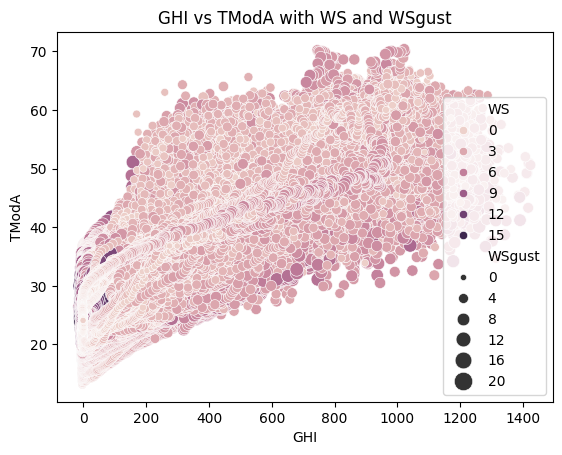

Text(0.5, 1.0, 'WS  vs GHI with Wind Direction (WD)')

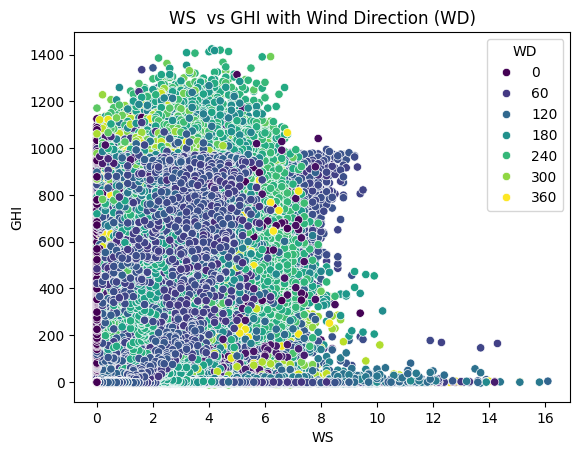

In [6]:
sns.scatterplot(data=data, x='GHI', y="TModA", hue='WS', size='WSgust', sizes=(20, 200))
plt.title('GHI vs TModA with WS and WSgust')
plt.show()

sns.scatterplot(data=data, x='WS', y='GHI', hue='WD', palette='viridis')
plt.title('WS  vs GHI with Wind Direction (WD)')

`Wind Analysis`

Text(0.5, 1.0, 'Wind Rose: Wind Speed and Direction')

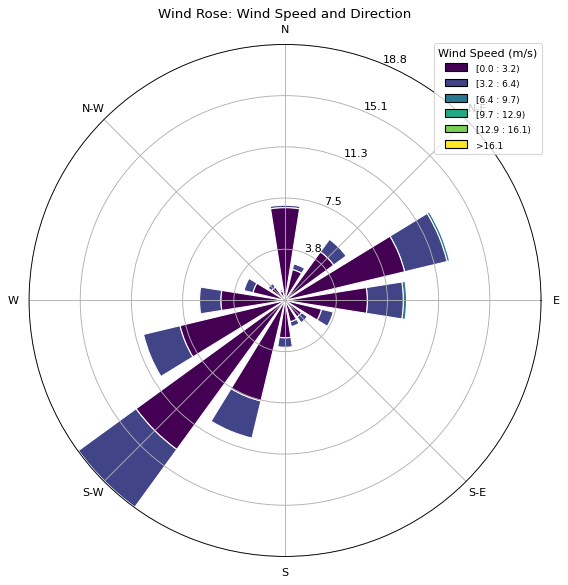

In [7]:
wind_speed = data['WS']
wind_direction = data['WD']

from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(wind_direction, wind_speed, normed=True, opening=0.8, edgecolor='white')

ax.set_legend(title='Wind Speed (m/s)', loc="upper right")
ax.set_title("Wind Rose: Wind Speed and Direction")


`Temperature Analysis`

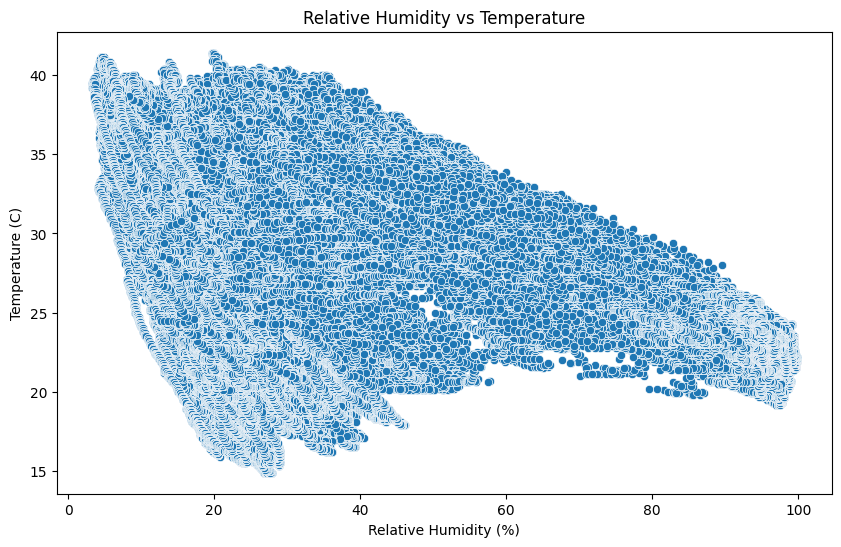

Correlation between RH and Tamb: -0.40041046735162944
Correlation between RH and GHI: -0.2580767185532021
Correlation between RH and DNI: -0.32788653289314623
Correlation between RH and DHI: -0.155015674944251


In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['RH'], y=data['Tamb'])
plt.title('Relative Humidity vs Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (C)')
plt.show()

correlation = data['RH'].corr(data['Tamb'])
print(f"Correlation between RH and Tamb: {correlation}")

correlation_ghi = data['RH'].corr(data['GHI'])
correlation_dni = data['RH'].corr(data['DNI'])
correlation_dhi = data['RH'].corr(data['DHI'])

print(f"Correlation between RH and GHI: {correlation_ghi}")
print(f"Correlation between RH and DNI: {correlation_dni}")
print(f"Correlation between RH and DHI: {correlation_dhi}")

`Histograms`

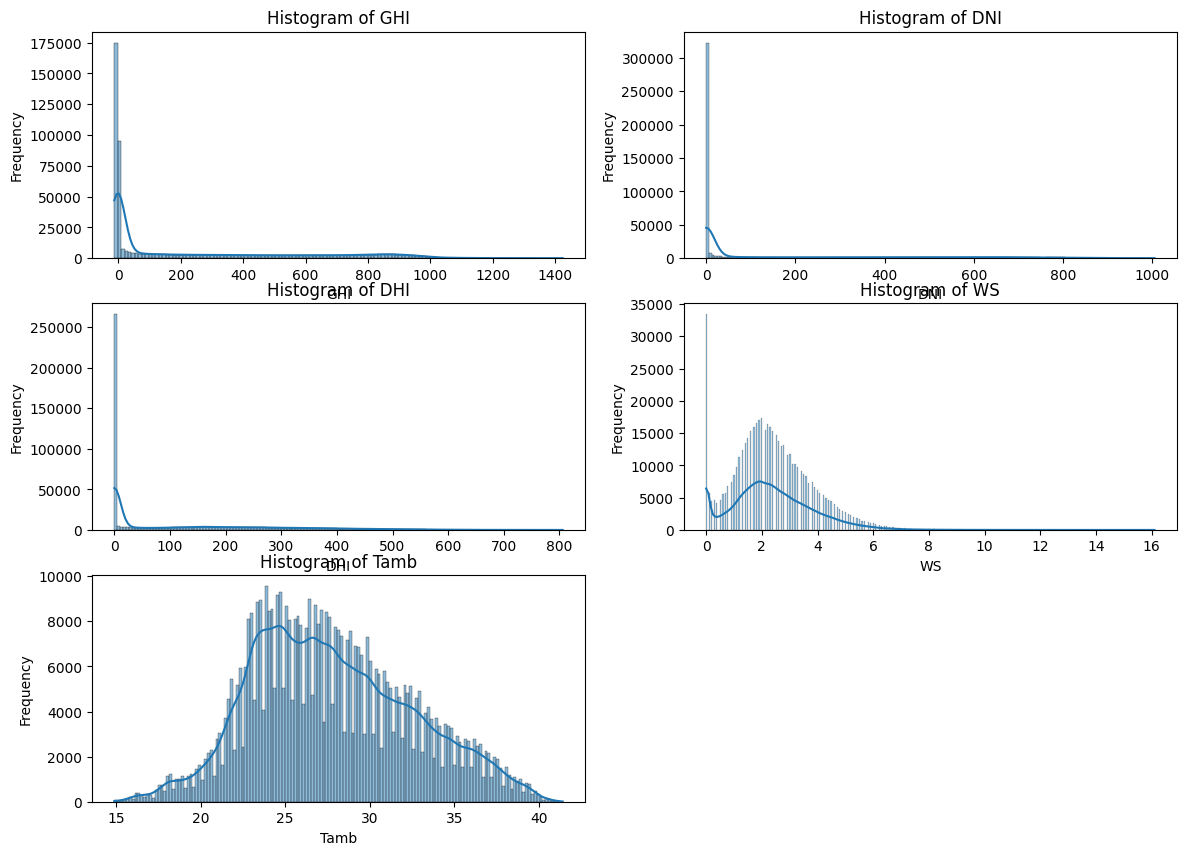

In [ ]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']

plt.figure(figsize=(14,10))

for i, variable in enumerate(variables, 1):
  plt.subplot(3, 2, i)
  sns.histplot(data[variable], kde=True)
  plt.title(f'Histogram of {variable}')
  plt.xlabel(variable)
  plt.ylabel('Frequency')

`Z-Score Analysis`

Outliers in GHI:
  Timestamp
2022-04-15 12:18:00    1223.0
2022-04-15 12:19:00    1267.0
2022-04-15 12:20:00    1243.0
2022-04-15 12:24:00    1234.0
2022-04-15 12:26:00    1263.0
                        ...  
2022-10-14 10:51:00    1221.0
2022-10-14 10:53:00    1285.0
2022-10-14 10:54:00    1202.0
2022-10-14 10:55:00    1267.0
2022-10-14 10:57:00    1214.0
Name: GHI, Length: 305, dtype: float64
Outliers in DNI:
  Timestamp
2021-10-30 11:01:00    989.8
2021-11-21 10:53:00    905.5
2021-11-21 11:03:00    906.1
2021-11-21 11:04:00    907.7
2021-11-21 11:05:00    907.4
                       ...  
2022-02-02 14:48:00    910.3
2022-02-02 14:49:00    907.8
2022-02-02 14:53:00    906.1
2022-02-02 14:54:00    906.8
2022-10-14 10:43:00    913.7
Name: DNI, Length: 1062, dtype: float64
Outliers in DHI:
  Timestamp
2022-01-03 11:13:00    609.5
2022-01-04 10:33:00    608.3
2022-01-04 10:53:00    618.1
2022-01-04 10:54:00    646.1
2022-01-04 10:55:00    636.9
                       ...  
2022-10-14 

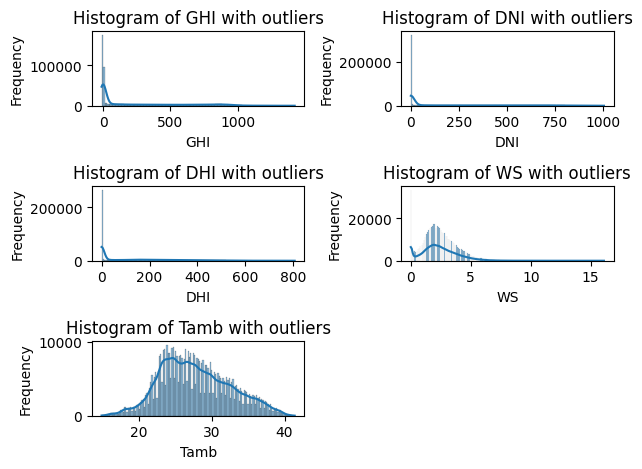

In [10]:
from scipy.stats import zscore
z_scores= data[variables].apply(zscore)

outliers = (z_scores > 3) | (z_scores < -3)

for variable in variables:
  print(f"Outliers in {variable}:\n ", data[variable][outliers[variable]])
  
for i, variable in enumerate(variables, 1):
  plt.subplot(3, 2, i)
  sns.histplot(data[variable], kde=True)
  plt.title(f"Histogram of {variable} with outliers")
  plt.xlabel(variable)
  plt.ylabel('Frequency')
  
plt.tight_layout()
plt.show()


`Bubble Charts`

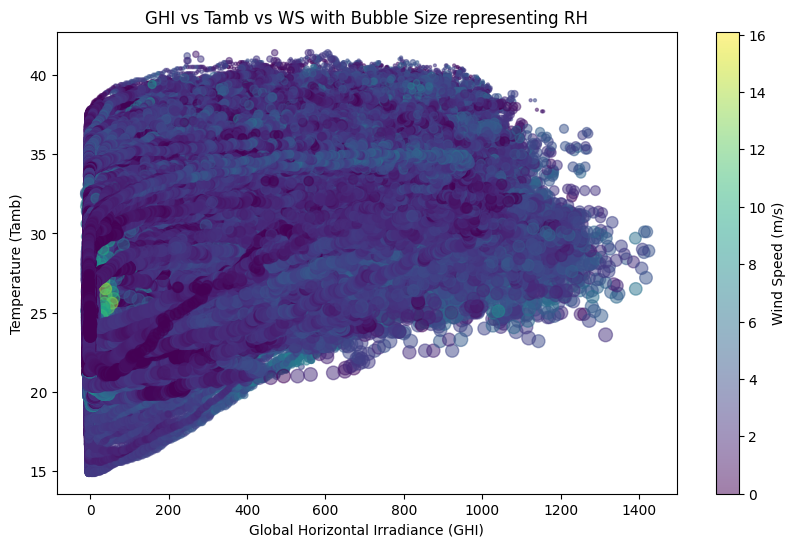

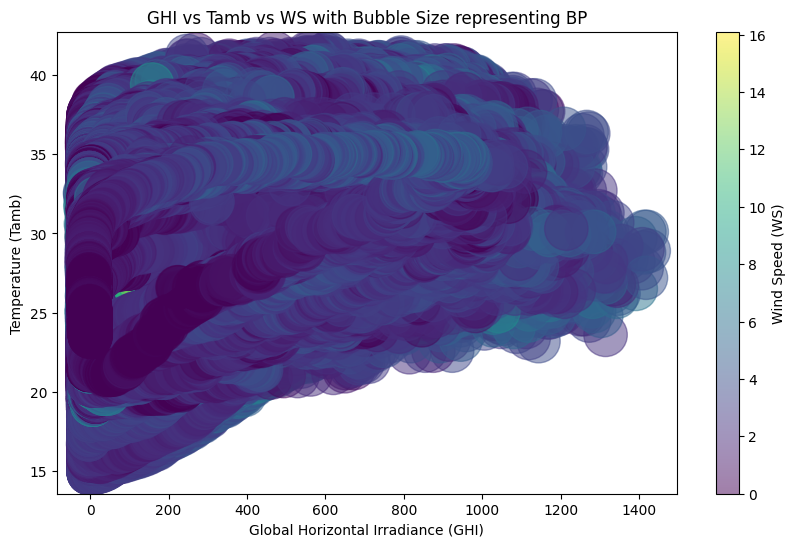

In [11]:
plt.figure(figsize=(10, 6))
bubble_size = data['RH']
plt.scatter(data['GHI'], data['Tamb'], s=bubble_size, alpha=0.5, c=data['WS'], cmap='viridis')
plt.colorbar(label='Wind Speed (m/s)')
plt.title('GHI vs Tamb vs WS with Bubble Size representing RH')
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Temperature (Tamb)')
plt.show()

plt.figure(figsize=(10, 6))
bubble_size = data['BP']
plt.scatter(data['GHI'], data['Tamb'], s=bubble_size, alpha=0.5, c=data['WS'], cmap='viridis')
plt.colorbar(label='Wind Speed (WS)')
plt.title('GHI vs Tamb vs WS with Bubble Size representing BP')
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Temperature (Tamb)')
plt.show()

`Data Cleaning`

In [15]:
data.drop(columns=['Comments'], inplace=True)
print("Cleaned DataFrame: \n", data.head())

data.to_csv('../data/cleaned_data/cleaned_togo-dapaong_qc.csv', index=False)

Cleaned DataFrame: 
           Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4  
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4  
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4  
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4  
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4  
